[View in Colaboratory](https://colab.research.google.com/github/sambogoat/ml-random-forest-temperatures/blob/master/random_forest.ipynb)

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving temps.csv to temps.csv
User uploaded file "temps.csv" with length 14434 bytes


In [3]:
import pandas as pd

features = pd.read_csv('temps.csv')

features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
print('The shape of our data is', features.shape)

('The shape of our data is', (348, 12))


In [0]:
import datetime

years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')

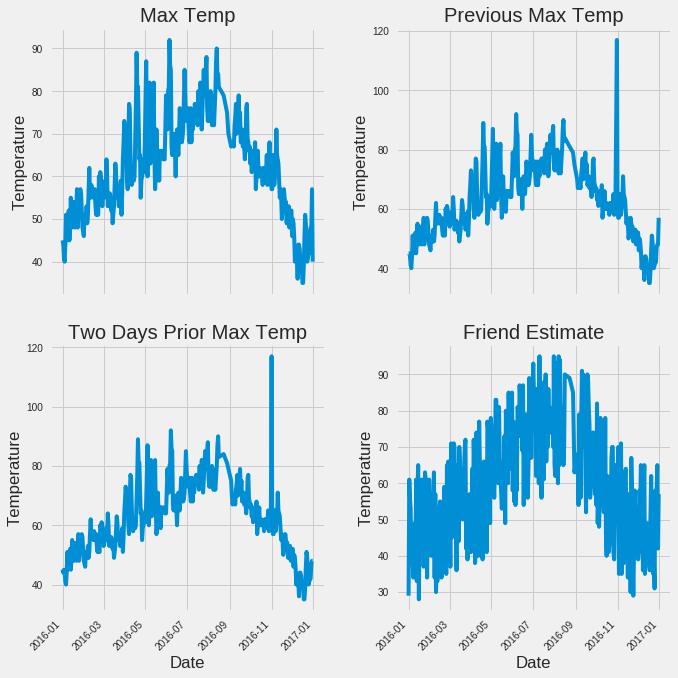

In [7]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [0]:
features = pd.get_dummies(features)

In [9]:
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [0]:
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [0]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)



In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (261, 17))
('Training Labels Shape:', (261,))
('Testing Features Shape:', (87, 17))
('Testing Labels Shape:', (87,))


In [0]:
baseline_pred = test_features[:, feature_list.index('average')]

baseline_errors = abs(test_labels - baseline_pred)

In [14]:
print('Average baseline error:', round(np.mean(baseline_errors), 2))

('Average baseline error:', 5.06)


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Question - is 1000 compatible with 261 rows in the training data?
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 3.87, 'degrees.')


In [17]:
mape = 100 * (errors / test_labels) # mean absolute percentage error

accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')



('Accuracy:', 93.94, '%.')


In [31]:
!pip install pydot
!apt install graphviz -y 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 2

7Progress: [ 10%] [######....................................................] 8Selecting previously unselected package libwebp6:amd64.
Preparing to unpack .../05-libwebp6_0.6.0-3_amd64.deb ...
7Progress: [ 11%] [######....................................................] 8Unpacking libwebp6:amd64 (0.6.0-3) ...
7Progress: [ 12%] [######....................................................] 8Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../06-libxpm4_1%3a3.5.12-1_amd64.deb ...
7Progress: [ 13%] [#######...................................................] 8Unpacking libxpm4:amd64 (1:3.5.12-1) ...
7Progress: [ 14%] [########..................................................] 8Selecting previously unselected package libgd3:amd64.
Preparing to unpack .../07-libgd3_2.2.5-3_amd64.deb ...
7Progress: [ 15%] [#########.................................................] 8Unpacking libgd3:amd64 (2.2.5-3) ...
7Progress: [ 16%] [#########.....................

Selecting previously unselected package libpathplan4.
Preparing to unpack .../21-libpathplan4_2.38.0-16ubuntu2_amd64.deb ...
7Progress: [ 45%] [##########################................................] 8Unpacking libpathplan4 (2.38.0-16ubuntu2) ...
7Progress: [ 46%] [##########################................................] 8Selecting previously unselected package libgvc6.
Preparing to unpack .../22-libgvc6_2.38.0-16ubuntu2_amd64.deb ...
7Progress: [ 47%] [###########################...............................] 8Unpacking libgvc6 (2.38.0-16ubuntu2) ...
7Progress: [ 48%] [###########################...............................] 8Selecting previously unselected package libgvpr2.
Preparing to unpack .../23-libgvpr2_2.38.0-16ubuntu2_amd64.deb ...
7Progress: [ 49%] [############################..............................] 8Unpacking libgvpr2 (2.38.0-16ubuntu2) ...
7Progress: [ 50%] [#############################.............................] 87Progress: [ 51%] [##

7Progress: [ 92%] [#####################################################.....] 8Setting up libxaw7:amd64 (2:1.0.13-1) ...
7Progress: [ 93%] [######################################################....] 8Setting up libpangoft2-1.0-0:amd64 (1.40.12-1) ...
7Progress: [ 94%] [######################################################....] 87Progress: [ 95%] [#######################################################...] 8Setting up libpangocairo-1.0-0:amd64 (1.40.12-1) ...
7Progress: [ 96%] [#######################################################...] 8Setting up libgvc6 (2.38.0-16ubuntu2) ...
7Progress: [ 97%] [########################################################..] 8Setting up graphviz (2.38.0-16ubuntu2) ...
7Progress: [ 98%] [#########################################################.] 87Progress: [ 99%] [#########################################################.] 8Processing triggers for libc-bin (2.26-0ubuntu2.1) ...

78

In [0]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph,) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')

In [0]:
files.download('tree.png')

**Note** there are only 2 variables we actually used to make a prediction! 

According to this particular decision tree, the rest of the features are not important for making a prediction. **Month of the year**, **day of the month**, and our **friend’s prediction** are utterly useless for predicting the maximum temperature tomorrow! 

The only important information according to our simple tree is the **temperature 1 day prior** and the **historical average**. 

Visualizing the tree has increased our domain knowledge of the problem, and we now know what data to look for if we are asked to make a prediction!